In [37]:
#First, import the required libraries.

import numpy as np
import pyomo.environ as pyo
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [38]:
# next,  read the data
file_path = "C:\\Users\\User\\Desktop\\data\\diabetes.csv"
data = pd.read_csv(file_path)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [39]:
#next, To describe the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [40]:
data["BMI"]

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [43]:
data["BMI"] = sorted(data["BMI"])
data["BMI"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
763    53.2
764    55.0
765    57.3
766    59.4
767    67.1
Name: BMI, Length: 768, dtype: float64

In [44]:
data["DiabetesPedigreeFunction"] = sorted(data["DiabetesPedigreeFunction"])
data["DiabetesPedigreeFunction"]

0      0.078
1      0.084
2      0.085
3      0.085
4      0.088
       ...  
763    1.893
764    2.137
765    2.288
766    2.329
767    2.420
Name: DiabetesPedigreeFunction, Length: 768, dtype: float64

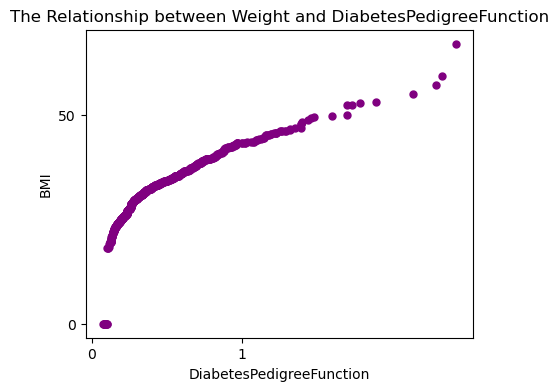

In [45]:
plt.figure(figsize = (5,4))
plt.scatter(data["DiabetesPedigreeFunction"],data["BMI"], color ='purple', marker='o', s = 25)
plt.xticks([0, 1])
plt.ylabel("BMI")
plt.xlabel("DiabetesPedigreeFunction")
plt.title("The Relationship between Weight and DiabetesPedigreeFunction")
plt.yticks([0, 50])
plt.show()
#With an increase in weight, the likelihood of developing diabetes increases.

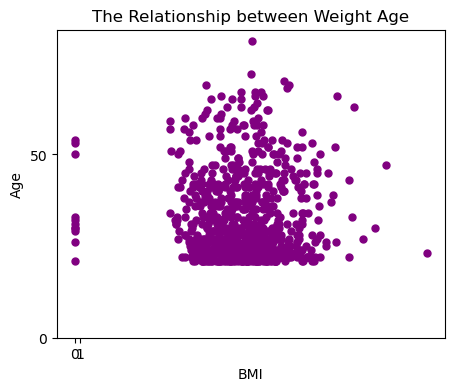

In [46]:
plt.figure(figsize = (5,4))
plt.scatter(data["BMI"],data["Age"], color ='purple', marker='o', s = 25)
plt.xticks([0, 1])
plt.xlabel("BMI")
plt.ylabel("Age")
plt.title("The Relationship between Weight Age")
plt.yticks([0, 50])
plt.show()

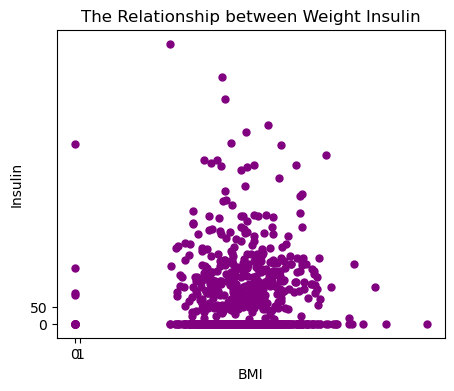

In [47]:
plt.figure(figsize = (5,4))
plt.scatter(data["BMI"],data["Insulin"], color ='purple', marker='o', s = 25)
plt.xticks([0, 1])
plt.xlabel("BMI")
plt.ylabel("Insulin")
plt.title("The Relationship between Weight Insulin")
plt.yticks([0, 50])
plt.show()

In [48]:
print(data["BMI"].min())
print(data["BMI"].max())
print(data["DiabetesPedigreeFunction"].min())
print(data["DiabetesPedigreeFunction"].max())

0.0
67.1
0.078
2.42


In [49]:
#or
data["BMI"].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [50]:
#or
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [51]:
df = pd.DataFrame(data)
pd.isna(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


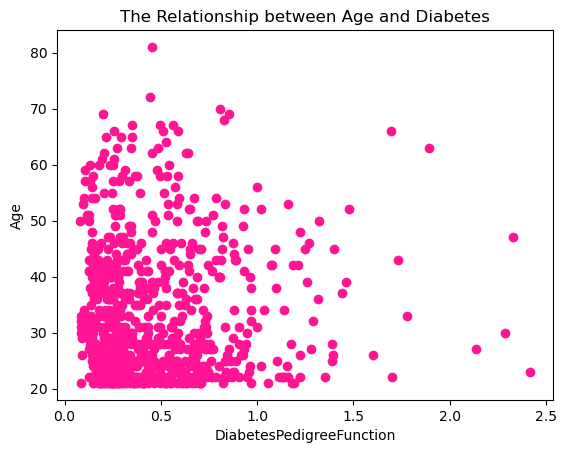

<Figure size 500x800 with 0 Axes>

In [53]:
#Now, the relationship between age and diabetes 
plt.scatter(data["DiabetesPedigreeFunction"], data["Age"], color = "deeppink")
plt.xlabel("DiabetesPedigreeFunction")
plt.ylabel("Age")
plt.title("The Relationship between Age and Diabetes")
plt.figure(figsize = (5,8))
plt.show()

In [54]:
#According to the chart above,With an increase in Age, the likelihood of developing diabetes increases.

Text(0, 0.5, 'DiabetesPedigreeFunction')

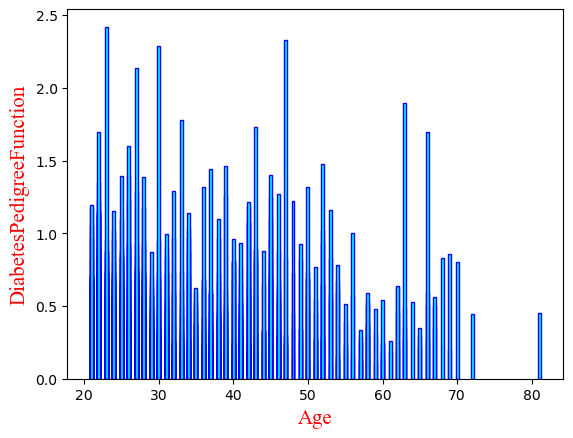

In [55]:
#"Bar chart" or "Bar plot"

categories= data["Age"]
number= data["DiabetesPedigreeFunction"]

fig, ax=plt.subplots() 
ax.bar(categories, number, color='cyan', edgecolor='blue', width=0.4)
ax.set_xlabel('Age', fontname='Times New Roman', fontsize=15, color='red')
ax.set_ylabel('DiabetesPedigreeFunction', fontname='Times New Roman', fontsize=15, color='red')


Text(0, 0.5, 'Insulin')

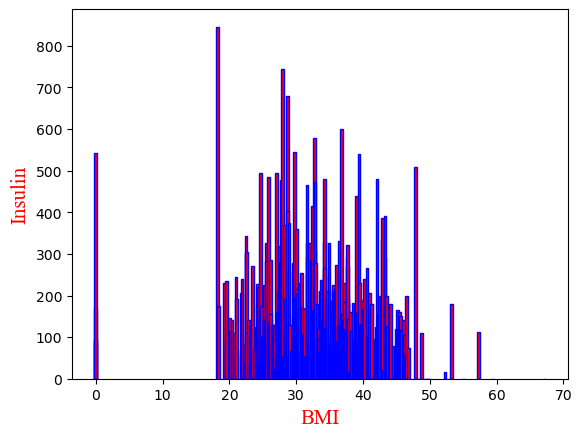

In [57]:
#"Bar chart" or "Bar plot"

categories= data["BMI"]
number= data["Insulin"]

fig, ax=plt.subplots() 
ax.bar(categories, number, color='RED', edgecolor='blue', width=0.4)
ax.set_xlabel('BMI', fontname='Times New Roman', fontsize=15, color='red')
ax.set_ylabel('Insulin', fontname='Times New Roman', fontsize=15, color='red')


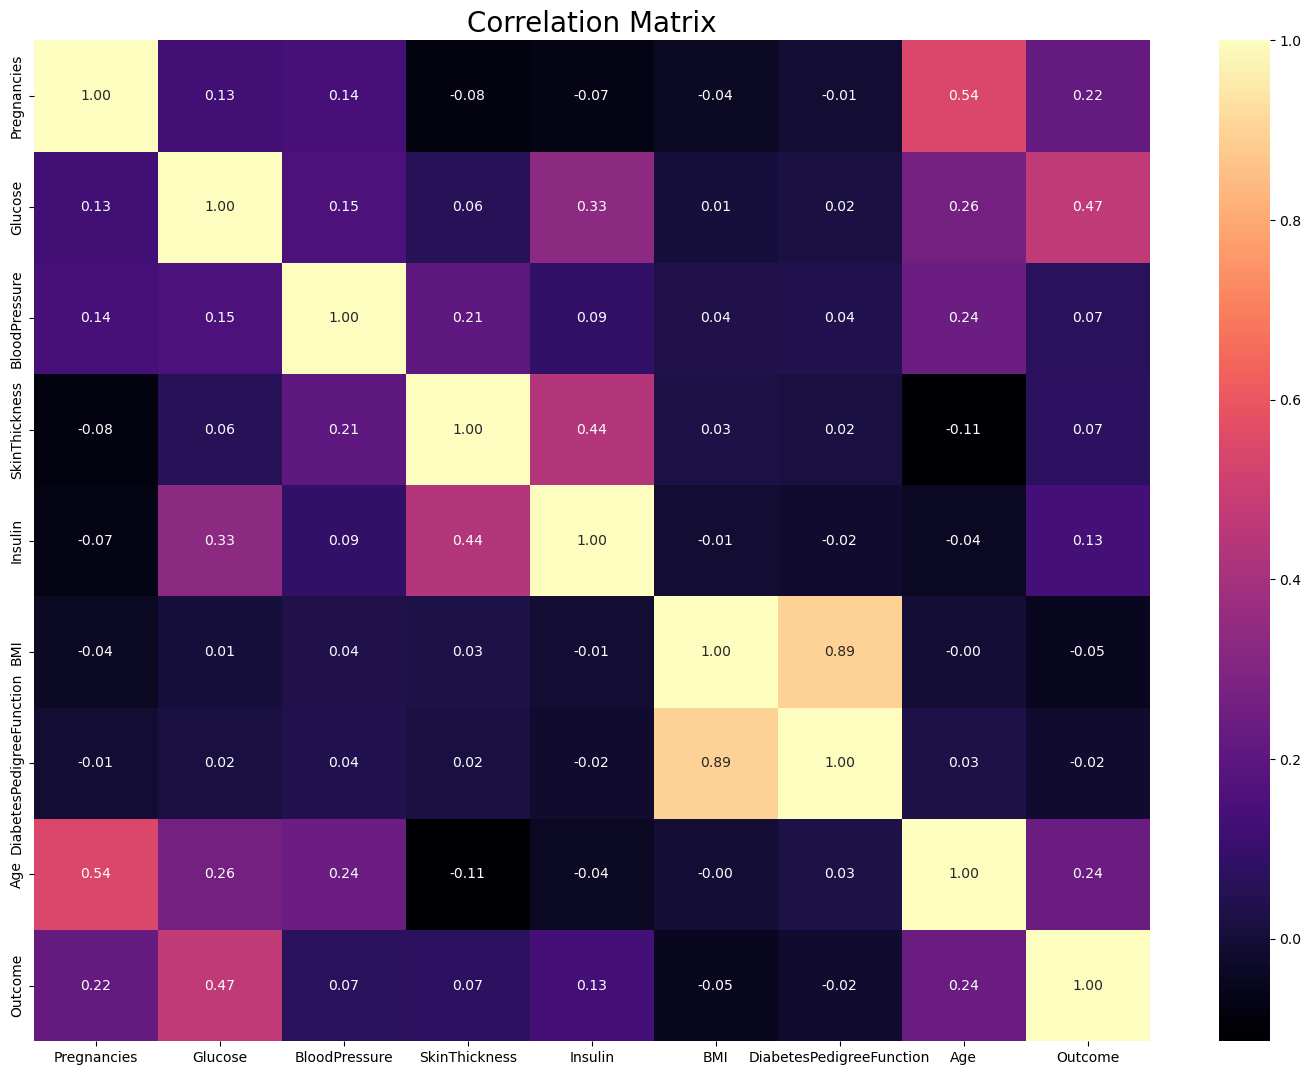

In [62]:
df.corr()
# Korelasyon Matrisi
f, ax = plt.subplots(figsize=[18, 13])
sb.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

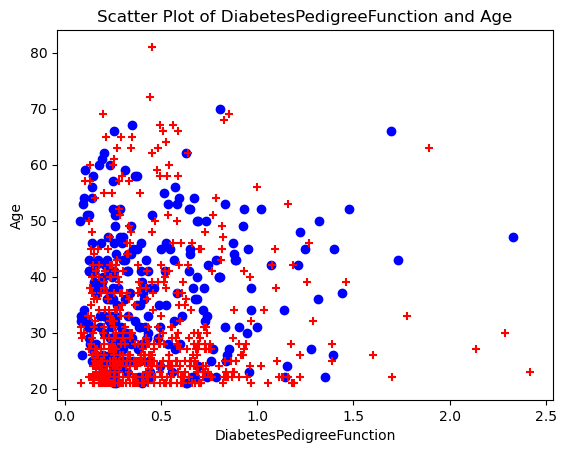

In [63]:
x_train = data["DiabetesPedigreeFunction"].values  # تبدیل سری به آرایه
y_train = data["Age"].values  # تبدیل سری به آرایه

# تعیین ویژگی برای تفکیک داده‌ها (مثلاً Outcome)
outcome = data["Outcome"].values  

fig, ax = plt.subplots()



ax.scatter(x_train[outcome == 1], y_train[outcome == 1], marker='o', color="blue", label='Diabetic')
ax.scatter(x_train[outcome == 0], y_train[outcome == 0], marker='+', color="red", label='Non-Diabetic')

ax.set_xlabel("DiabetesPedigreeFunction")
ax.set_ylabel("Age")
ax.set_title("Scatter Plot of DiabetesPedigreeFunction and Age")


plt.show()

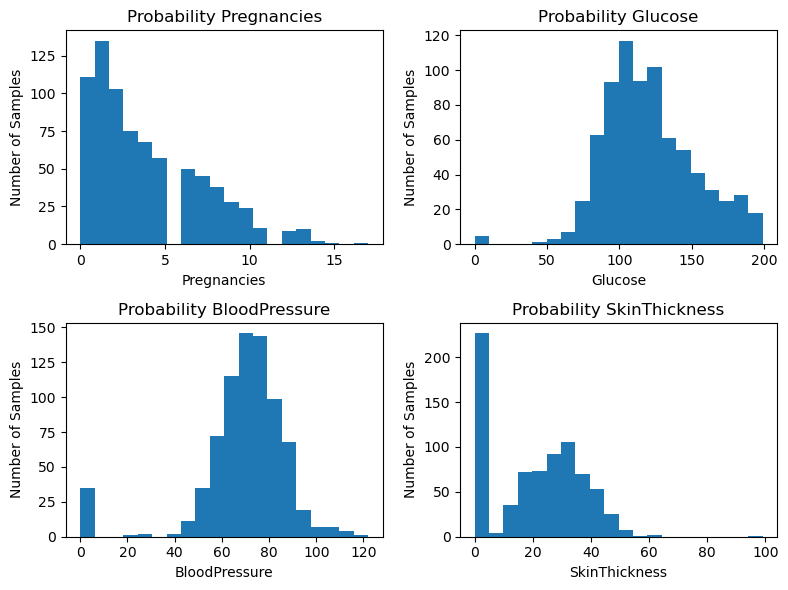

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(8,6))


# رسم نمودار توزیع در دستگاه اوّل (axes[0, 0])
axes[0, 0].hist(data['Pregnancies'], bins=20)
axes[0, 0].set_xlabel('Pregnancies')
axes[0, 0].set_ylabel('Number of Samples')
axes[0, 0].set_title('Probability Pregnancies')



axes[0, 1].hist(data['Glucose'], bins=20)
axes[0, 1].set_xlabel('Glucose')
axes[0, 1].set_ylabel('Number of Samples')
axes[0, 1].set_title('Probability Glucose')

# رسم نمودار توزیع BMI در دستگاه سوم (axes[1, 0])
axes[1, 0].hist(data['BloodPressure'], bins=20)
axes[1, 0].set_xlabel('BloodPressure')
axes[1, 0].set_ylabel('Number of Samples')
axes[1, 0].set_title('Probability BloodPressure')





# رسم نمودار توزیع سن در دستگاه چهارم (axes[1, 1])
axes[1, 1].hist(data['SkinThickness'], bins=20)
axes[1, 1].set_xlabel('SkinThickness')
axes[1, 1].set_ylabel('Number of Samples')
axes[1, 1].set_title('Probability SkinThickness')

plt.tight_layout()


plt.show()

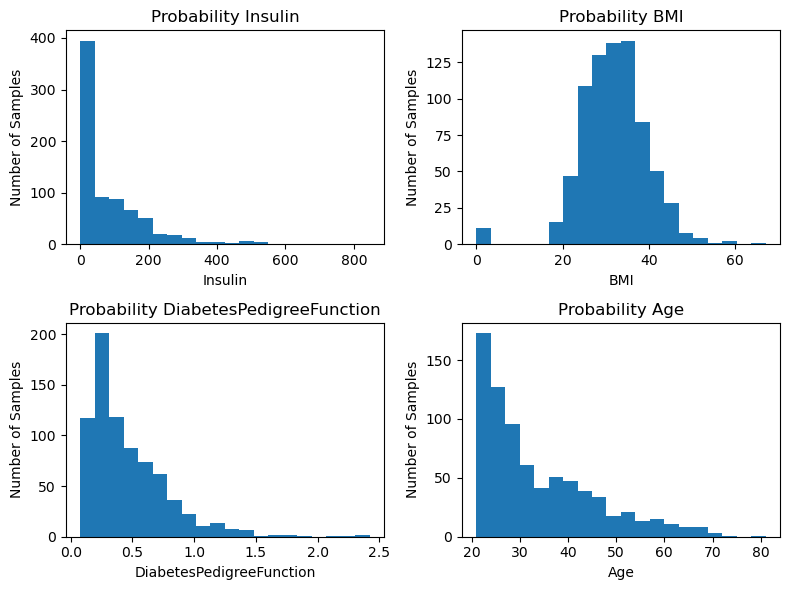

In [65]:
fig, axes = plt.subplots(2, 2, figsize=(8,6))




# رسم نمودار توزیع (axes[0, 0])
axes[0, 0].hist(data['Insulin'], bins=20)
axes[0, 0].set_xlabel('Insulin')
axes[0, 0].set_ylabel('Number of Samples')
axes[0, 0].set_title('Probability Insulin')



axes[0, 1].hist(data['BMI'], bins=20)
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Number of Samples')
axes[0, 1].set_title('Probability BMI')


axes[1, 0].hist(data['DiabetesPedigreeFunction'], bins=20)
axes[1, 0].set_xlabel('DiabetesPedigreeFunction')
axes[1, 0].set_ylabel('Number of Samples')
axes[1, 0].set_title('Probability DiabetesPedigreeFunction')





# رسم نمودار توزیع سن در دستگاه چهارم (axes[1, 1])
axes[1, 1].hist(data['Age'], bins=20)
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Number of Samples')
axes[1, 1].set_title('Probability Age')


plt.tight_layout()
plt.show()

In [74]:
#ارتباط بین متغیرها را با استفاده از نمودارهای انحراف ازمعیار

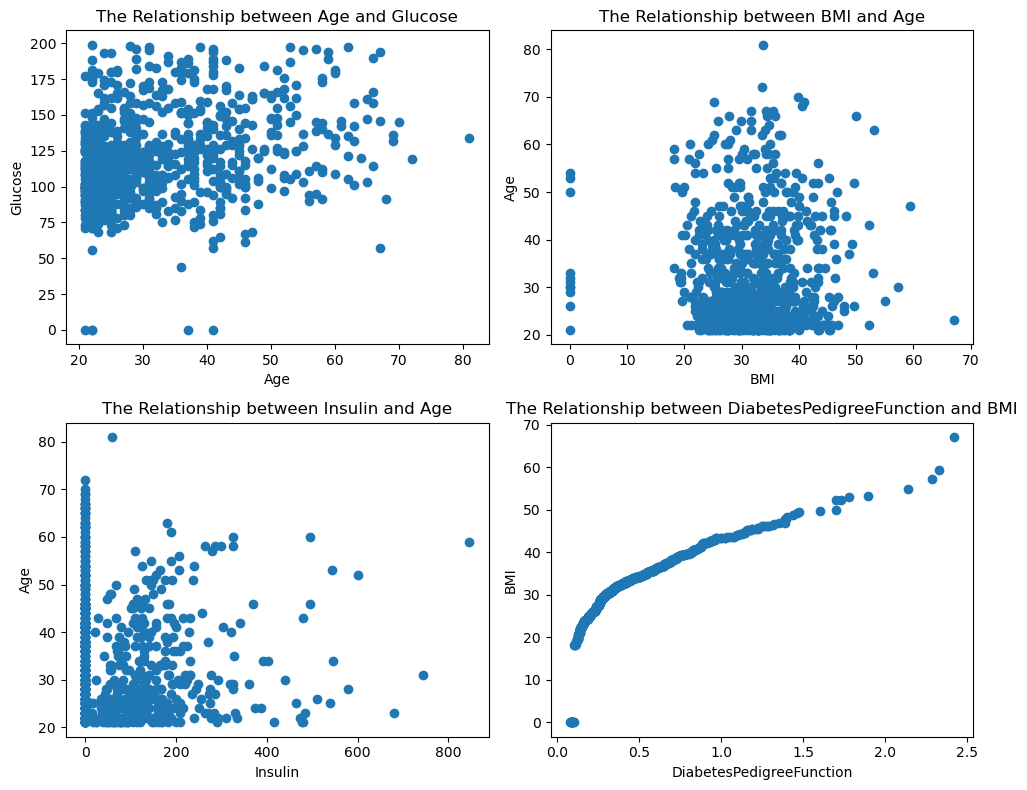

In [75]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# رسم نمودار انحراف بین سن و میزان گلوکز در دستگاه اوّل (axes[0, 0])
axes[0, 0].scatter(data['Age'], data['Glucose'])
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Glucose')
axes[0, 0].set_title('The Relationship between Age and Glucose')

# رسم نمودار انحراف بین BMI و Age در دستگاه دوم (axes[0, 1])
axes[0, 1].scatter(data['BMI'], data['Age'])
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Age')
axes[0, 1].set_title('The Relationship between BMI and Age')

# رسم نمودار انحراف بین Insulin و Age در دستگاه سوم (axes[1, 0])
axes[1, 0].scatter(data['Insulin'], data['Age'])
axes[1, 0].set_xlabel('Insulin')
axes[1, 0].set_ylabel('Age')
axes[1, 0].set_title('The Relationship between Insulin and Age')

# رسم نمودار انحراف  بین DiabetesPedigreeFunction و BMI در دستگاه چهارم (axes[1, 1])
axes[1, 1].scatter(data['DiabetesPedigreeFunction'], data['BMI'])
axes[1, 1].set_xlabel('DiabetesPedigreeFunction')
axes[1, 1].set_ylabel('BMI')
axes[1, 1].set_title('The Relationship between DiabetesPedigreeFunction and BMI')


plt.tight_layout()

plt.show()

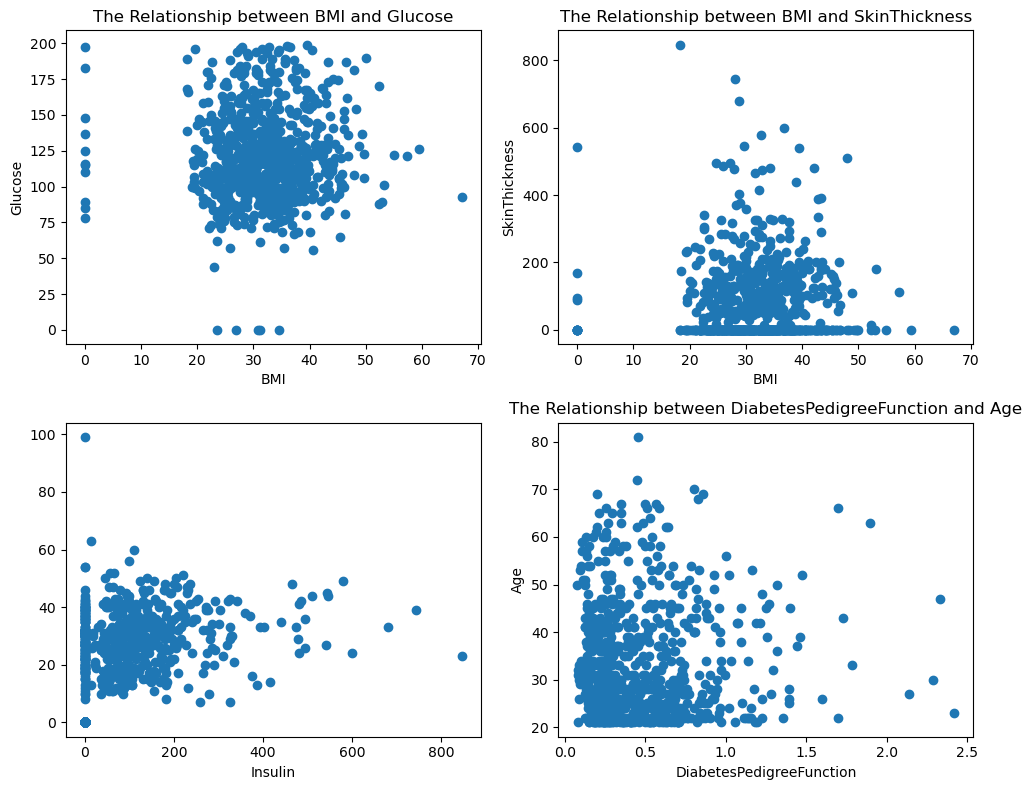

In [76]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# رسم نمودار انحراف بین  وزن و میزان گلوکز در دستگاه اوّل (axes[0, 0])
axes[0, 0].scatter(data['BMI'], data['Glucose'])
axes[0, 0].set_xlabel('BMI')
axes[0, 0].set_ylabel('Glucose')
axes[0, 0].set_title('The Relationship between BMI and Glucose')


axes[0, 1].scatter(data['BMI'], data['Insulin'])
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Insulin')
axes[0, 1].set_title('The Relationship between BMI and Insulin')



axes[1, 0].scatter(data['Insulin'], data['SkinThickness'])
axes[1, 0].set_xlabel('Insulin')
axes[0, 1].set_ylabel('SkinThickness')
axes[0, 1].set_title('The Relationship between BMI and SkinThickness')


axes[1, 1].scatter(data['DiabetesPedigreeFunction'], data['Age'])
axes[1, 1].set_xlabel('DiabetesPedigreeFunction')
axes[1, 1].set_ylabel('Age')
axes[1, 1].set_title('The Relationship between DiabetesPedigreeFunction and Age')


plt.tight_layout()

plt.show()

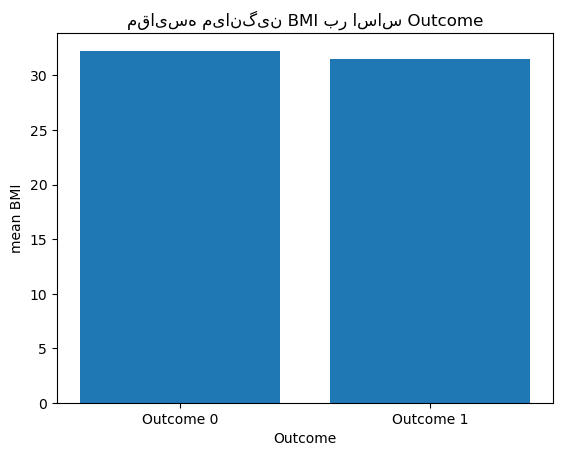

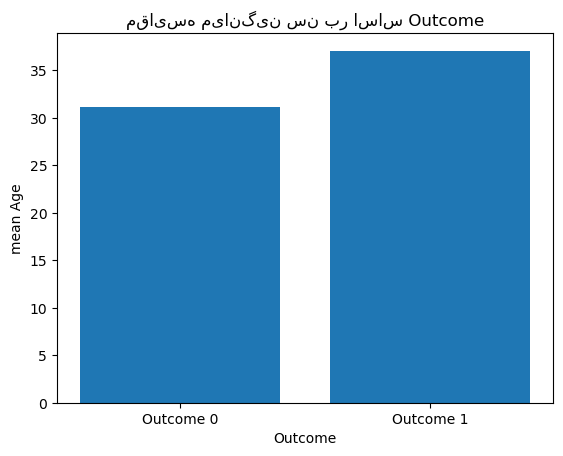

In [77]:

# دستبندی داده بر اساس "Outcome" (0 و 1)
outcome_0 = data[data['Outcome'] == 0]
outcome_1 = data[data['Outcome'] == 1]

# میانگین BMI بر اساس دسته "Outcome"

mean_bmi_0 = outcome_0['BMI'].mean()
mean_bmi_1 = outcome_1['BMI'].mean()


mean_age_0 = outcome_0['Age'].mean()
mean_age_1 = outcome_1['Age'].mean()


plt.bar(['Outcome 0', 'Outcome 1'], [mean_bmi_0, mean_bmi_1])
plt.xlabel('Outcome')
plt.ylabel('mean BMI')
plt.title('مقایسه میانگین BMI بر اساس Outcome')


plt.show()

plt.bar(['Outcome 0', 'Outcome 1'], [mean_age_0, mean_age_1])
plt.xlabel('Outcome')
plt.ylabel('mean Age')
plt.title('مقایسه میانگین سن بر اساس Outcome')

plt.show()

In [78]:
# NOW SAMPLE

In [79]:
#First, import the required libraries.

import numpy as np
import pyomo.environ as pyo
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [80]:
# next,  read the data
file_path = "C:\\Users\\User\\Desktop\\data\\diabetes.csv"
data = pd.read_csv(file_path)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [81]:
sample_size = len(data) // 2  # محاسبه تعداد نمونه ها (نصف داده ها)
sampled_data = data.sample(n=sample_size, random_state=42)  # نمونه گیری با استفاده از تابع sample

In [82]:
X = sampled_data.iloc[:, :-1]  # ویژگها (تمام ستونها به جز آخر)
y = sampled_data.iloc[:, -1]

In [83]:
mean = sampled_data.mean()
std = sampled_data.std()

In [84]:
print(sampled_data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
668            6       98             58             33      190  34.0   
324            2      112             75             32        0  35.7   
624            2      108             64              0        0  30.8   
690            8      107             80              0        0  24.6   
473            7      136             90              0        0  29.9   
..           ...      ...            ...            ...      ...   ...   
578           10      133             68              0        0  27.0   
664            6      115             60             39        0  33.7   
100            1      163             72              0        0  39.0   
445            0      180             78             63       14  59.4   
689            1      144             82             46      180  46.1   

     DiabetesPedigreeFunction  Age  Outcome  
668                     0.430   43        0  
324                

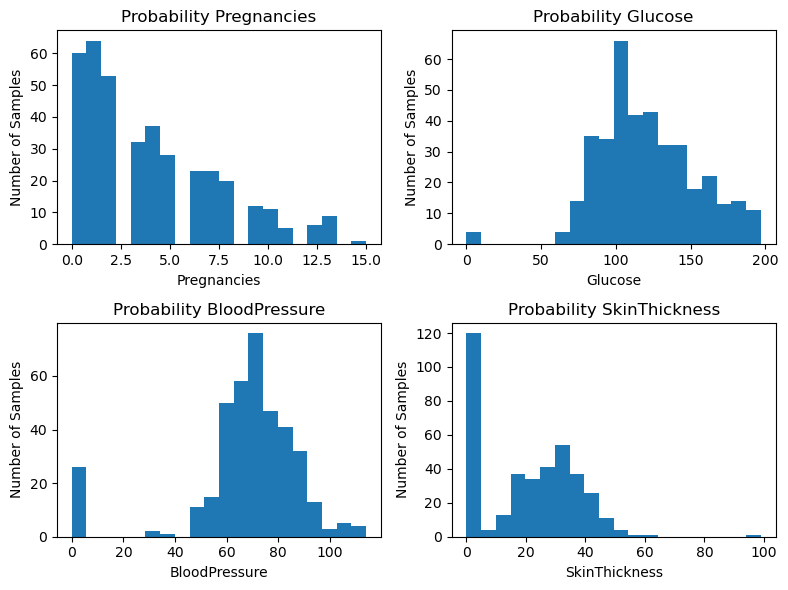

In [85]:
fig, axes = plt.subplots(2, 2, figsize=(8,6))


# رسم نمودار توزیع در دستگاه اوّل (axes[0, 0])
axes[0, 0].hist(sampled_data['Pregnancies'], bins=20)
axes[0, 0].set_xlabel('Pregnancies')
axes[0, 0].set_ylabel('Number of Samples')
axes[0, 0].set_title('Probability Pregnancies')



axes[0, 1].hist(sampled_data['Glucose'], bins=20)
axes[0, 1].set_xlabel('Glucose')
axes[0, 1].set_ylabel('Number of Samples')
axes[0, 1].set_title('Probability Glucose')

# رسم نمودار توزیع BMI در دستگاه سوم (axes[1, 0])
axes[1, 0].hist(sampled_data['BloodPressure'], bins=20)
axes[1, 0].set_xlabel('BloodPressure')
axes[1, 0].set_ylabel('Number of Samples')
axes[1, 0].set_title('Probability BloodPressure')





# رسم نمودار توزیع سن در دستگاه چهارم (axes[1, 1])
axes[1, 1].hist(sampled_data['SkinThickness'], bins=20)
axes[1, 1].set_xlabel('SkinThickness')
axes[1, 1].set_ylabel('Number of Samples')
axes[1, 1].set_title('Probability SkinThickness')

plt.tight_layout()


plt.show()